# Wine quality - classification

<b>Data set from https://archive.ics.uci.edu/ml/datasets/Wine+Quality</b>
<br><br>Citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
<br><br>Data set infomation: "The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods".</b>
<br><br><b>Attribute Information:</b>
<br><b>Input variables (based on physicochemical tests):</b>
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
<br><b>Output variable (based on sensory data):</b>
12 - quality (score between 0 and 10)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

## Load data

In [2]:
df = pd.read_csv('winequality-white.csv')
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [3]:
df = pd.read_csv('winequality-white.csv', delimiter=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df.shape

(4898, 12)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Feature engineering

<b>Ph</b> is used to measure ripeness in relation to acidity. Lower pH numbers mean a more acidic wine. Most wine pH's fall around 3 or 4. Some wines reach slightly beyond that. A wine with a pH of 3 is ten times more acidic than a wine with a pH of 4.
<br>Our data ph level falls between min = 2.72 and max = 3.82. No outliers detected in max value area, but we have outliers in min value area, so I will eliminate all data in quantile(0.05). 

In [7]:
min_thr_ph = df['pH'].quantile(0.05)
min_thr_ph

2.96

In [8]:
df1 = df[df['pH'] > min_thr_ph]

In [9]:
df1.shape

(4602, 12)

In [10]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000,4602.000000
mean,6.806682,0.279513,0.331658,6.272001,0.045489,35.485984,138.937093,0.993980,3.205691,0.491958,10.536585,5.882442
std,0.811100,0.100801,0.119032,5.005081,0.020818,16.994069,42.205911,0.002967,0.138309,0.114092,1.224627,0.883499
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.970000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.260000,1.700000,0.036000,23.000000,109.000000,0.991700,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.310000,5.100000,0.043000,34.000000,134.000000,0.993700,3.190000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.600000,0.050000,46.000000,168.000000,0.996000,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The <b>alcohol content</b> in white wine varies from 5% to 14% but comes in at an average of 10%. Removing outliers in alchool maximum level > 14.

In [11]:
max_thr_alcohol = df1['alcohol'].quantile(0.999)
max_thr_alcohol

14.0

In [12]:
df2 = df1[df1['alcohol'] <= max_thr_alcohol]

In [13]:
df2.shape

(4600, 12)

In [14]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,6.806989,0.279426,0.331739,6.272554,0.045492,35.487935,138.950326,0.993982,3.205698,0.491928,10.535025,5.881957
std,0.811118,0.100700,0.118961,5.005597,0.020822,16.997506,42.210209,0.002966,0.138331,0.114059,1.222603,0.883383
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.970000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.260000,1.700000,0.036000,23.000000,109.000000,0.991700,3.100000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.315000,5.100000,0.043000,34.000000,134.000000,0.993700,3.190000,0.480000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.600000,0.050000,46.000000,168.000000,0.996000,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.000000,9.000000


The predominant <b>fixed acids</b> found in wines are tartaric, malic, citric, and succinic. Their levels found in wine: 1 to 5 mg/L tartaric acid, 0 to 8 mg/L malic acid, 0 to 0.7 mg/L citric acid, and 0.4 to 2 mg/L succinic acid.
<br>Fixed acid level goes from min = 3.8 to max = 14.2. Removing extreme values for fixed acidity > 0.95 quantile.
<br>Citric acid level goes from min = 0 to max = 1.66. Removing extreme values for citric acid > 0.99 quantile.

In [15]:
max_thr_fixacc = df2['fixed acidity'].quantile(0.95)
max_thr_fixacc

8.2

In [16]:
df3 = df2[df2['fixed acidity'] < max_thr_fixacc]

In [17]:
max_thr_ca = df3['citric acid'].quantile(0.99)
max_thr_ca

0.74

In [18]:
df4 = df3[df3['citric acid'] < max_thr_ca]

In [19]:
df4.shape

(4292, 12)

In [20]:
df4.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000,4292.000000
mean,6.693278,0.279365,0.321699,6.272309,0.045483,35.778891,138.730196,0.993892,3.211333,0.492423,10.548034,5.903075
std,0.681858,0.099251,0.105300,4.980345,0.020776,17.059618,41.690929,0.002965,0.137906,0.113444,1.233169,0.880891
min,3.800000,0.080000,0.000000,0.700000,0.009000,2.000000,9.000000,0.987110,2.970000,0.220000,8.000000,3.000000
25%,6.200000,0.210000,0.260000,1.700000,0.036000,24.000000,109.000000,0.991640,3.110000,0.410000,9.500000,5.000000
50%,6.700000,0.260000,0.310000,5.100000,0.043000,34.000000,134.000000,0.993600,3.190000,0.480000,10.400000,6.000000
75%,7.200000,0.320000,0.370000,9.512500,0.050000,46.000000,167.250000,0.995900,3.300000,0.550000,11.400000,6.000000
max,8.100000,1.100000,0.730000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.000000,9.000000


<b>Volatile acidity (VA)</b> is a measure of the wine's volatile (or gaseous) acids. The maximum volatile acidity, calculated as acetic acid and exclusive of sulfur dioxide, is 1.2 g/L acetic acid for white wines.
Volatile acidity falls in normal limits, between min = 0.08 and max = 1.1. No outiers detected.

<b>SO2 (Total sulfur dioxide)</b> Total SO2 = SO2 free + SO2 reacted
<br>SO2 is an essential winemaking additive for its properties of anti-oxidation and preservation. In great quantities, it can cause adverse reactions and can be toxic for wine consumers. This is why the amounts of SO2 in wine are regulated by law.
The dataset is related to white variants of the Portuguese "Vinho Verde" wine. According to UE legislation (Commision Delegated Regulation EU 2019/934) the maximum limit for SO2 in white wine is max = 400 mg/l.
Removing extreme values for total sulfur dioxide > 400.

In [21]:
max_thr_so = df4[df4['total sulfur dioxide'] > 400]
max_thr_so

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4745,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3


In [22]:
df5 = df4[df4['total sulfur dioxide'] < 400]

In [23]:
df5.shape

(4291, 12)

In [24]:
df5.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000,4291.000000
mean,6.693416,0.279370,0.321715,6.273095,0.045482,35.719879,138.659986,0.993893,3.211279,0.492389,10.548046,5.903752
std,0.681878,0.099263,0.105307,4.980660,0.020778,16.617711,41.441245,0.002965,0.137877,0.113435,1.233313,0.879877
min,3.800000,0.080000,0.000000,0.700000,0.009000,2.000000,9.000000,0.987110,2.970000,0.220000,8.000000,3.000000
25%,6.200000,0.210000,0.260000,1.700000,0.036000,24.000000,109.000000,0.991640,3.110000,0.410000,9.500000,5.000000
50%,6.700000,0.260000,0.310000,5.100000,0.043000,34.000000,134.000000,0.993600,3.190000,0.480000,10.400000,6.000000
75%,7.200000,0.320000,0.370000,9.525000,0.050000,46.000000,167.000000,0.995900,3.295000,0.550000,11.400000,6.000000
max,8.100000,1.100000,0.730000,65.800000,0.346000,146.500000,313.000000,1.038980,3.820000,1.080000,14.000000,9.000000


SO2 is still unbalanced. I\`m using standard deviation to remove outliers.
<br>In general 68% of data are within 1 standard deviation from the mean, 95% are within 2 std and 99.7% are within 3 std.
<br>I\`m using 3 std and I will remove all data under and over 3 std. 

In [25]:
lower_std_so = df5['total sulfur dioxide'].mean() - 3*df5['total sulfur dioxide'].std()
lower_std_so

14.336250994249212

In [26]:
upper_std_so = df5['total sulfur dioxide'].mean() + 3*df5['total sulfur dioxide'].std()
upper_std_so

262.98372104024156

In [27]:
df5[(df5['total sulfur dioxide'] < lower_std_so) | (df5['total sulfur dioxide'] > upper_std_so)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
227,7.1,0.250,0.32,10.30,0.041,66.0,272.0,0.99690,3.17,0.52,9.1,6
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
1931,7.1,0.490,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
2654,6.9,0.400,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.4,5
3050,6.2,0.255,0.24,1.70,0.039,138.5,272.0,0.99452,3.53,0.53,9.6,4
3710,4.7,0.670,0.09,1.00,0.020,5.0,9.0,0.98722,3.30,0.34,13.6,5
3901,4.8,0.650,0.12,1.10,0.013,4.0,10.0,0.99246,3.32,0.36,13.5,4


In [28]:
df6 = df5[(df5['total sulfur dioxide'] > lower_std_so) & (df5['total sulfur dioxide'] < upper_std_so)]

In [29]:
df6.shape

(4284, 12)

In [30]:
df6.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000,4284.000000
mean,6.694013,0.279129,0.321886,6.276844,0.045487,35.645892,138.539566,0.993893,3.211125,0.492428,10.547377,5.905929
std,0.680923,0.098931,0.105258,4.982143,0.020777,16.373596,41.036794,0.002965,0.137854,0.113452,1.232186,0.878185
min,3.800000,0.080000,0.000000,0.700000,0.009000,2.000000,19.000000,0.987110,2.970000,0.220000,8.000000,3.000000
25%,6.200000,0.210000,0.260000,1.700000,0.036000,24.000000,109.000000,0.991640,3.110000,0.410000,9.500000,5.000000
50%,6.700000,0.260000,0.310000,5.100000,0.043000,34.000000,134.000000,0.993600,3.190000,0.480000,10.400000,6.000000
75%,7.200000,0.320000,0.370000,9.562500,0.050000,46.000000,167.000000,0.995900,3.290000,0.550000,11.400000,6.000000
max,8.100000,1.100000,0.730000,65.800000,0.346000,128.000000,260.000000,1.038980,3.820000,1.080000,14.000000,9.000000


<b>RS (Residual Sugar)</b> is from natural grape sugars leftover in a wine, after the alcoholic fermentation finishes. It is measured in grams per liter. Dry wines contain about 10 g/L of residual sugar. Sweet wines start at around 35 grams per liter of residual sugar and then go up from there.
<br> RS value goes from min = 0.7 to max = 65.8. No outliers detected.

<b>Chlorides</b> is the amount of salt in wine. Median amount is 0.043 g per l. No outliers detected.

## Preparing data for simple validation (train/test split)

#### Split the target variable "quality" from data set

In [31]:
x_df = df6.drop(['quality'], axis=1)
y_df = df6['quality']

#### Split data into train and test

In [32]:
from sklearn.model_selection import train_test_split
tts = train_test_split(x_df, y_df, test_size=0.3, random_state=42)
x_train, x_test, y_train, y_test = tts

In [33]:
df_x_train = pd.DataFrame(x_train)
df_y_train = pd.DataFrame(y_train)
df_x_train.columns = list(x_df.columns)
df_y_train.columns = ['quality']

In [34]:
x_train.shape, x_test.shape

((2998, 11), (1286, 11))

In [35]:
y_train.shape, y_test.shape

((2998,), (1286,))

In [36]:
df_x_test = pd.DataFrame(x_test)
df_y_test = pd.DataFrame(y_test)
df_x_test.columns = list(x_df.columns)
df_y_test.columns = ['quality']

## Dimensionality reduction

### Low correlation filter between features and quality

#### Plotting initial correlation matrix to see the correlation between features

In [37]:
correlation_init = pd.concat([df_x_train, df_y_train], axis=1)
cols = list(df6.columns)
correlation_init.columns = cols
correlation_init.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2750,5.8,0.17,0.34,1.80,0.045,96.0,170.0,0.99035,3.38,0.90,11.8,8
4039,6.1,1.10,0.16,4.40,0.033,8.0,109.0,0.99058,3.35,0.47,12.4,4
2884,7.0,0.28,0.32,7.75,0.032,30.0,114.0,0.99158,3.12,0.64,12.8,7
418,7.4,0.21,0.27,1.20,0.041,27.0,99.0,0.99270,3.19,0.33,9.8,6
3614,6.4,0.38,0.24,7.20,0.047,41.0,151.0,0.99604,3.11,0.60,9.2,5


In [38]:
correlation_init = correlation_init.corr(method='pearson')
correlation_init

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.044721,0.262393,0.130630,0.048597,0.019236,0.157095,0.265776,-0.381385,0.018500,-0.115995,-0.045928
volatile acidity,-0.044721,1.000000,-0.174824,0.077052,0.063328,-0.124107,0.073859,0.031032,-0.049251,-0.069308,0.065160,-0.194145
citric acid,0.262393,-0.174824,1.000000,0.081321,0.098441,0.131552,0.124186,0.120268,-0.159416,0.065719,-0.055577,0.039110
residual sugar,0.130630,0.077052,0.081321,1.000000,0.093261,0.313155,0.391790,0.844343,-0.192454,-0.048275,-0.443952,-0.125331
chlorides,0.048597,0.063328,0.098441,0.093261,1.000000,0.095602,0.186175,0.257125,-0.100920,-0.001731,-0.348795,-0.227166
free sulfur dioxide,0.019236,-0.124107,0.131552,0.313155,0.095602,1.000000,0.603565,0.314301,-0.069737,0.053658,-0.272798,0.014563
total sulfur dioxide,0.157095,0.073859,0.124186,0.391790,0.186175,0.603565,1.000000,0.527297,-0.045676,0.112401,-0.461712,-0.189732
density,0.265776,0.031032,0.120268,0.844343,0.257125,0.314301,0.527297,1.000000,-0.068205,0.060633,-0.774066,-0.327974
pH,-0.381385,-0.049251,-0.159416,-0.192454,-0.100920,-0.069737,-0.045676,-0.068205,1.000000,0.121769,0.093015,0.076443
sulphates,0.018500,-0.069308,0.065719,-0.048275,-0.001731,0.053658,0.112401,0.060633,0.121769,1.000000,-0.022363,0.056285


<AxesSubplot:>

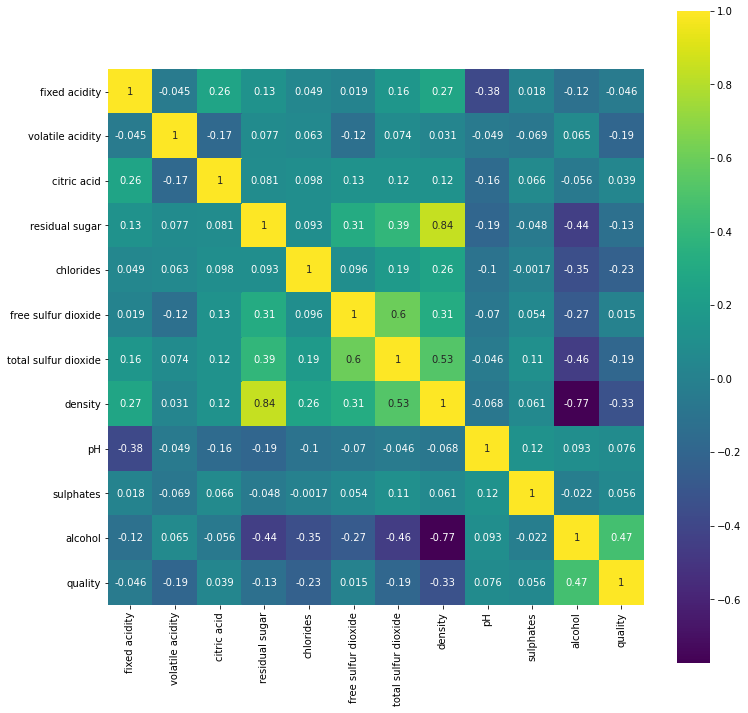

In [39]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation_init, vmax=1, square=True, annot=True, cmap='viridis')

Correlation levels of each feature with the target varible are not very high. None is > 0.5.
<br>Some features have very low correlation with wine quality.
<br><b>Eliminate irelevant features with a very low correlation level with wine quality (< 0.10).</b>

In [40]:
correlation_init = abs(correlation_init['quality'])
irelevant_features = correlation_init[correlation_init<0.10]
irelevant_features

fixed acidity          0.045928
citric acid            0.039110
free sulfur dioxide    0.014563
pH                     0.076443
sulphates              0.056285
Name: quality, dtype: float64

In [41]:
df_x_train = df_x_train.drop(['fixed acidity','citric acid', 'free sulfur dioxide', 'pH', 'sulphates'], axis=1)
df_x_train.head()

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,alcohol
2750,0.17,1.80,0.045,170.0,0.99035,11.8
4039,1.10,4.40,0.033,109.0,0.99058,12.4
2884,0.28,7.75,0.032,114.0,0.99158,12.8
418,0.21,1.20,0.041,99.0,0.99270,9.8
3614,0.38,7.20,0.047,151.0,0.99604,9.2


### ANOVA (analysis of variance) F-value For Feature Selection

The variance of a feature determines how much it is influencing the target variable. Low variance means there is no impact on the target variable.

In [42]:
df_x_train_fclassif = pd.DataFrame(x_train)
df_x_train_fclassif.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
2750,5.8,0.17,0.34,1.80,0.045,96.0,170.0,0.99035,3.38,0.90,11.8
4039,6.1,1.10,0.16,4.40,0.033,8.0,109.0,0.99058,3.35,0.47,12.4
2884,7.0,0.28,0.32,7.75,0.032,30.0,114.0,0.99158,3.12,0.64,12.8
418,7.4,0.21,0.27,1.20,0.041,27.0,99.0,0.99270,3.19,0.33,9.8
3614,6.4,0.38,0.24,7.20,0.047,41.0,151.0,0.99604,3.11,0.60,9.2


In [43]:
from sklearn.feature_selection import SelectKBest, f_classif

# k = number of features we want to keep
fclassif = SelectKBest(f_classif, k=6)
fclassif.fit(df_x_train_fclassif, y_train)

SelectKBest(k=6)

In [44]:
# show relevant features
df_x_train_fclassif.columns[fclassif.get_support()]

Index(['volatile acidity', 'residual sugar', 'chlorides',
       'total sulfur dioxide', 'density', 'alcohol'],
      dtype='object')

The result of using F-value for feature selection is the same as the result of analysing the correlation matrix, which is the scaled version of the covariance matrix. "Covariance is a measure of the joint variability of two random variables".

### Ploting correlation matrix with relevant features

In [45]:
correlation_final = pd.concat([df_x_train, df_y_train], axis=1)
correlation_final.head()

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,alcohol,quality
2750,0.17,1.80,0.045,170.0,0.99035,11.8,8
4039,1.10,4.40,0.033,109.0,0.99058,12.4,4
2884,0.28,7.75,0.032,114.0,0.99158,12.8,7
418,0.21,1.20,0.041,99.0,0.99270,9.8,6
3614,0.38,7.20,0.047,151.0,0.99604,9.2,5


In [46]:
correlation_final = correlation_final.corr(method = 'pearson')
correlation_final.head()

,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,alcohol,quality
volatile acidity,1.000000,0.077052,0.063328,0.073859,0.031032,0.065160,-0.194145
residual sugar,0.077052,1.000000,0.093261,0.391790,0.844343,-0.443952,-0.125331
chlorides,0.063328,0.093261,1.000000,0.186175,0.257125,-0.348795,-0.227166
total sulfur dioxide,0.073859,0.391790,0.186175,1.000000,0.527297,-0.461712,-0.189732
density,0.031032,0.844343,0.257125,0.527297,1.000000,-0.774066,-0.327974


<AxesSubplot:>

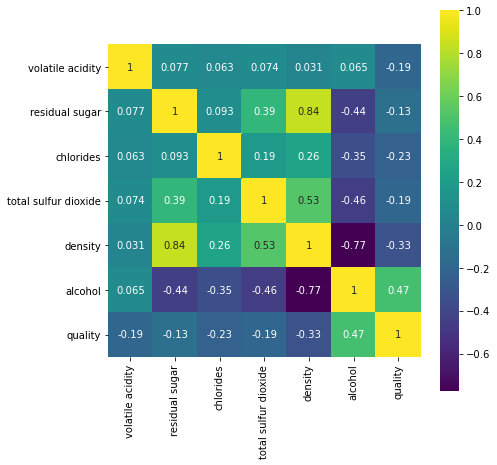

In [47]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation_final, vmax=1, square=True, annot=True, cmap='viridis')

Alcohol and density are highly correlated (negative correlation). Density can be removed.
<br> Residual sugar is highly correlated with density, medium correlated with alcohol and low correlated with the target variable. Residual sugar can be removed.

<b>With feature engineering the data set was reduced from 4.898 observations to 4.284.
<br><br>With dimensionality reduction the data set was reduced from 11 features to 4 features.
<br><br>Initial dimension of data set: 53.878 items -> actual data set: 17.136 items

### Data set after feature engineering and dimensionality reduction

In [48]:
df_x_train = df_x_train.drop(['density', 'residual sugar'], axis=1)
df_x_train.head()

,volatile acidity,chlorides,total sulfur dioxide,alcohol
2750,0.17,0.045,170.0,11.8
4039,1.10,0.033,109.0,12.4
2884,0.28,0.032,114.0,12.8
418,0.21,0.041,99.0,9.8
3614,0.38,0.047,151.0,9.2


## Determining strategy and choosing the models

I\`m implementing models with 2 features, 3 features and 4 features to see the results. I will start with the most correlated features with the target variable. Depending on the results, I will use cross-validation techniques to see what is the model with the optimum bias-variance tradeoff. 
<br><br>
The models for classification: <b>Support Vector Machine, Decision Tree and Random Forest</b>
<br><br>
<b>Support Vector Machine classifier</b> uses a hyperplane in multidimensional space, to separate the data points from different classes. The best hyperplane has the largest amount of margin (the distance between the hyperplane and the closest data points(support vectors)). 
<br>For non-linear or inseparable planes sklearn uses kernel functions to transform the input space into a higher dimensional space: polynomial (the degree of the polynomial is chosen iteratively), radial basis function (gamma parameter ranges from 0 to 1).
<br><br>
<b>Decision Tree</b> splits the data set into subsets (segments or regions) according to a parameter and is building a tree of nodes (root node, children nodes and leaf nodes - the terminal nodes that predict the outcome of the decision tree). The nodes architecture depends on determining the best feature/atribute from all features, that best splits the data set into subsets. The selection for the best features is made using different techniques: gini impurity, information gain, etc.
<br><br>
<b>Random Forest</b> builds a complex forest of decision trees and selects in the process random subsets of features. The output of Random Forest classifier is the class selected by most trees. (I bet it will be the best model for our classification task).

## Implementing the models

<b>The labels/classes from quality of wine

In [49]:
classes = np.unique(y_train)
print('Labels/Classes are: ', classes)

Labels/Classes are:  [3 4 5 6 7 8 9]


### Random Forest classification with 2 features

In [50]:
df_x_train_2f = df_x_train.drop(['volatile acidity', 'total sulfur dioxide'], axis=1)
df_x_train_2f.head()

,chlorides,alcohol
2750,0.045,11.8
4039,0.033,12.4
2884,0.032,12.8
418,0.041,9.8
3614,0.047,9.2


In [51]:
x_train_2f = df_x_train_2f.to_numpy()

In [52]:
df_x_test_2f = df_x_test.drop(['fixed acidity','citric acid', 'free sulfur dioxide', 'pH', 'sulphates', 'density', 'residual sugar', 'volatile acidity', 'total sulfur dioxide'], axis=1)
df_x_test_2f.head()

,chlorides,alcohol
2229,0.034,11.5
3595,0.031,12.1
4525,0.058,11.7
4079,0.052,10.4
1333,0.034,12.6


In [53]:
x_test_2f = df_x_test_2f.to_numpy()

In [54]:
rf_2f = RandomForestClassifier(n_estimators=250, random_state=42) 
rf_2f.fit(x_train_2f, y_train)

RandomForestClassifier(n_estimators=250, random_state=42)

In [55]:
y_train_pred_2f = rf_2f.predict(x_train_2f)
y_test_pred_2f = rf_2f.predict(x_test_2f)

<b>Visualizing the model

In [56]:
df_y_train_pred_2f = pd.DataFrame(y_train_pred_2f)
df_y_train_pred_2f.columns = list(df_y_train.columns)
df_2f = pd.concat([df_x_train_2f, df_y_train_pred_2f], axis = 1)

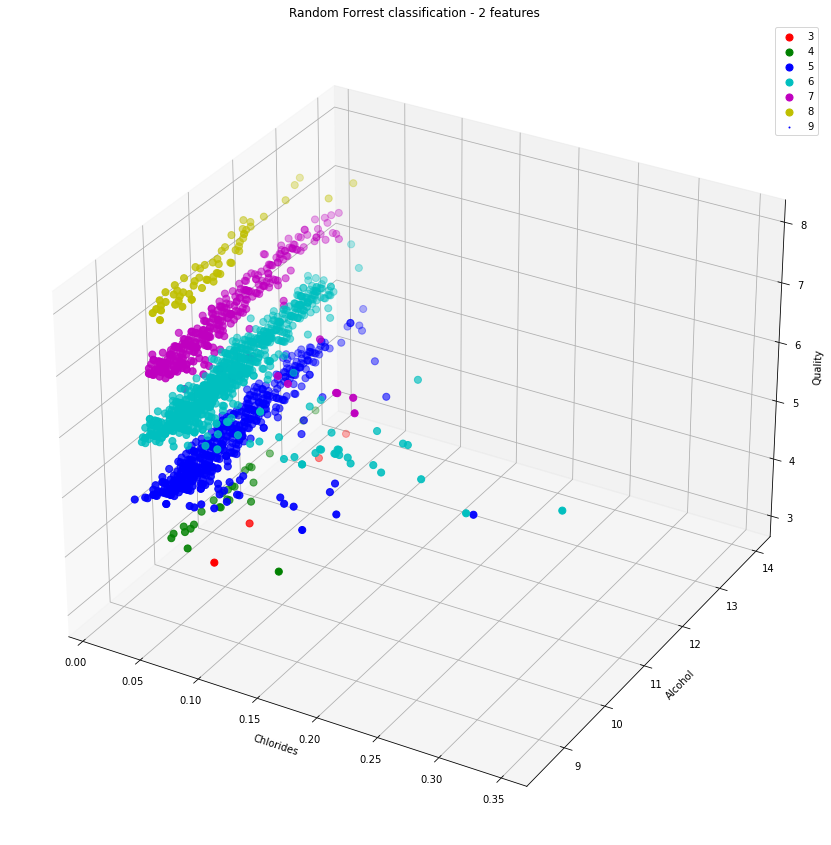

In [57]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Chlorides')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Quality')
ax.set_title('Random Forrest classification - 2 features')

categories = np.unique(df_y_train)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'b']
for labels, colors in zip(categories,colors):
    target_labels = df_2f['quality'] == labels
    ax.scatter(df_2f.loc[target_labels, 'chlorides'], 
               df_2f.loc[target_labels, 'alcohol'], 
               df_2f.loc[target_labels, 'quality'], 
               c = colors, 
               s = 50)
    
ax.legend(categories)
ax.grid()

<b>Checking the accuracy of the model

In [58]:
print("Score for train data: ", rf_2f.score(x_train_2f, y_train))
print("Score for test data: ", rf_2f.score(x_test_2f, y_test))

Score for train data:  0.7535023348899266
Score for test data:  0.5


In [59]:
cm_2f = confusion_matrix(y_test, y_test_pred_2f)
cm_2f

array([[  0,   0,   0,   4,   1,   0,   0],
       [  0,   1,  13,  18,   3,   1,   0],
       [  0,   9, 199, 158,  18,  11,   0],
       [  1,   6, 127, 334,  88,  13,   1],
       [  1,   1,  19, 104,  98,   5,   0],
       [  0,   5,   3,  15,  16,  11,   0],
       [  0,   0,   0,   1,   1,   0,   0]], dtype=int64)

Text(51.0, 0.5, 'Truth')

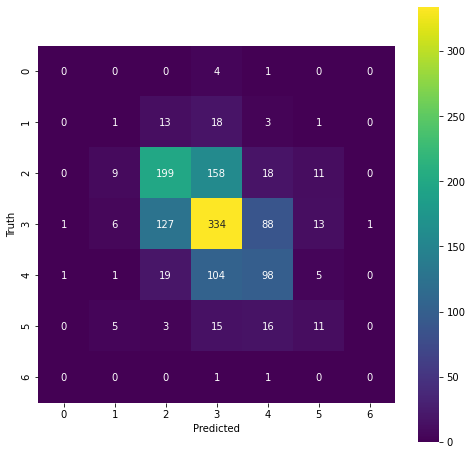

In [60]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_2f, square=True, annot=True, fmt="d", cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
rf_2f.predict([[0.06, 12.8]])

array([8], dtype=int64)

### Decision Tree classification with 2 features

To get the best score and the best bias-variance tradeoff from the model, I used iteratively the criterion parameter (gini or entropy) and the max_depth parameter (the depth of the tree).

In [62]:
dt_2f = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=4)
dt_2f.fit(x_train_2f, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [63]:
print("Score for train data: ", dt_2f.score(x_train_2f, y_train))
print("Score for test data: ", dt_2f.score(x_test_2f, y_test))

Score for train data:  0.5110073382254836
Score for test data:  0.5139968895800933


### SVM classification with 2 features

To get the best score and the best bias-variance tradeoff I used iteratively the kernel parameter (linear, poly, default = rbf). For polynomial the degree must be specified and for rbf, gamma parameter must be specified.

In [64]:
svm_2f = SVC(gamma=0.2, C=1, random_state=42)
svm_2f.fit(x_train_2f, y_train)

SVC(C=1, gamma=0.2, random_state=42)

In [65]:
print("Score for train data: ", svm_2f.score(x_train_2f, y_train))
print("Score for test data: ", svm_2f.score(x_test_2f, y_test))

Score for train data:  0.5096731154102735
Score for test data:  0.52099533437014


### Random Forest classification with 3 features

In [66]:
df_x_train_3f = df_x_train.drop(['total sulfur dioxide'], axis=1)
df_x_train_3f.head()

,volatile acidity,chlorides,alcohol
2750,0.17,0.045,11.8
4039,1.10,0.033,12.4
2884,0.28,0.032,12.8
418,0.21,0.041,9.8
3614,0.38,0.047,9.2


In [67]:
x_train_3f = df_x_train_3f.to_numpy()

In [68]:
df_x_test_3f = df_x_test.drop(['fixed acidity','citric acid', 'free sulfur dioxide', 'pH', 'sulphates', 'density', 'residual sugar', 'total sulfur dioxide'], axis=1)
df_x_test_3f.head()

,volatile acidity,chlorides,alcohol
2229,0.250,0.034,11.5
3595,0.160,0.031,12.1
4525,0.130,0.058,11.7
4079,0.265,0.052,10.4
1333,0.210,0.034,12.6


In [69]:
x_test_3f = df_x_test_3f.to_numpy()

In [70]:
rf_3f = RandomForestClassifier(n_estimators=300, random_state=42) 
rf_3f.fit(x_train_3f, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [71]:
y_train_pred_3f = rf_3f.predict(x_train_3f)
y_test_pred_3f = rf_3f.predict(x_test_3f)

<b>Checking the accuracy of the model

In [72]:
print("Score for train data: ", rf_3f.score(x_train_3f, y_train))
print("Score for test data: ", rf_3f.score(x_test_3f, y_test))

Score for train data:  0.985657104736491
Score for test data:  0.6267496111975117


In [73]:
cm_3f = confusion_matrix(y_test, y_test_pred_3f)
cm_3f

array([[  0,   0,   3,   2,   0,   0,   0],
       [  0,   4,  14,  17,   1,   0,   0],
       [  0,   4, 259, 120,  10,   2,   0],
       [  0,   1,  93, 398,  72,   6,   0],
       [  0,   1,   8,  88, 127,   4,   0],
       [  0,   0,   2,  11,  19,  18,   0],
       [  0,   0,   0,   1,   1,   0,   0]], dtype=int64)

<AxesSubplot:>

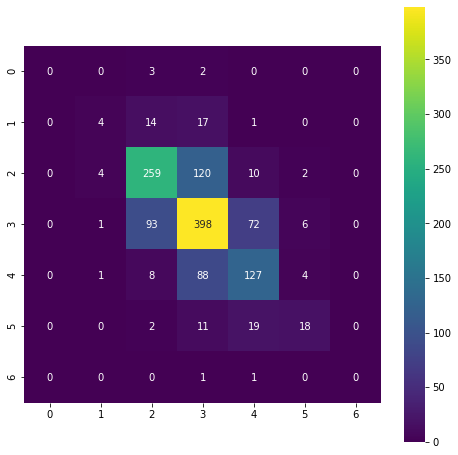

In [74]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_3f, square=True, annot=True, fmt="d", cmap='viridis')

In [75]:
rf_3f.predict([[0.06, 0.08, 12.8]])

array([6], dtype=int64)

### Decision Tree classification with 3 features

In [76]:
dt_3f = tree.DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=5)
dt_3f.fit(x_train_3f, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [77]:
print("Score for train data: ", dt_3f.score(x_train_3f, y_train))
print("Score for test data: ", dt_3f.score(x_test_3f, y_test))

Score for train data:  0.5683789192795197
Score for test data:  0.5373250388802489


### SVM classification with 3 features

In [78]:
svm_3f = SVC(gamma=0.2, C=1, random_state=42)
svm_3f.fit(x_train_3f, y_train)

SVC(C=1, gamma=0.2, random_state=42)

In [79]:
print("Score for train data: ", svm_3f.score(x_train_3f, y_train))
print("Score for test data: ", svm_3f.score(x_test_3f, y_test))

Score for train data:  0.5203468979319547
Score for test data:  0.526438569206843


### Random Forest classification with 4 features

In [80]:
df_x_train_4f = df_x_train
x_train_4f = df_x_train_4f.to_numpy()

In [81]:
df_x_test_4f = df_x_test.drop(['fixed acidity','citric acid', 'free sulfur dioxide', 'pH', 'sulphates', 'density', 'residual sugar'], axis=1)
df_x_test_4f.head()

,volatile acidity,chlorides,total sulfur dioxide,alcohol
2229,0.250,0.034,150.0,11.5
3595,0.160,0.031,123.0,12.1
4525,0.130,0.058,183.0,11.7
4079,0.265,0.052,91.0,10.4
1333,0.210,0.034,180.0,12.6


In [82]:
x_test_4f = df_x_test_4f.to_numpy()

In [83]:
rf_4f = RandomForestClassifier(n_estimators=170, random_state = 42)
rf_4f.fit(x_train_4f, y_train)

RandomForestClassifier(n_estimators=170, random_state=42)

In [84]:
y_train_pred_4f = rf_4f.predict(x_train_4f)
y_test_pred_4f = rf_4f.predict(x_test_4f)

<b>Checking the accuracy of the model

In [85]:
print("Score for train data: ", rf_4f.score(x_train_4f, y_train))
print("Score for test data: ", rf_4f.score(x_test_4f, y_test))

Score for train data:  1.0
Score for test data:  0.6477449455676516


In [86]:
cm_4f_train = confusion_matrix(y_train, y_train_pred_4f)
cm_4f_train

array([[   5,    0,    0,    0,    0,    0,    0],
       [   0,   92,    0,    0,    0,    0,    0],
       [   0,    0,  860,    0,    0,    0,    0],
       [   0,    0,    0, 1352,    0,    0,    0],
       [   0,    0,    0,    0,  576,    0,    0],
       [   0,    0,    0,    0,    0,  111,    0],
       [   0,    0,    0,    0,    0,    0,    2]], dtype=int64)

<AxesSubplot:>

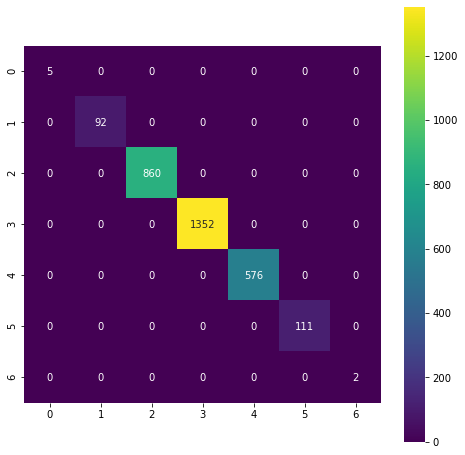

In [87]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_4f_train, square=True, annot=True, fmt="d", cmap='viridis')

In [88]:
cm_4f = confusion_matrix(y_test, y_test_pred_4f)
cm_4f

array([[  0,   0,   3,   2,   0,   0,   0],
       [  0,   5,  15,  16,   0,   0,   0],
       [  0,   2, 263, 123,   7,   0,   0],
       [  0,   0,  80, 419,  69,   2,   0],
       [  0,   1,   3,  95, 128,   1,   0],
       [  0,   0,   0,  17,  15,  18,   0],
       [  0,   0,   0,   0,   2,   0,   0]], dtype=int64)

<AxesSubplot:>

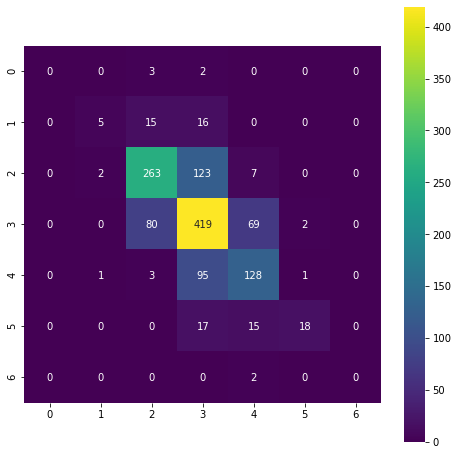

In [89]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_4f, square=True, annot=True, fmt="d", cmap='viridis')

In [90]:
rf_4f.predict([[0.8, 0.015, 100, 11]])

array([6], dtype=int64)

### Decision Tree classification with 4 features

In [91]:
dt_4f = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=18)
dt_4f.fit(x_train_4f, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=18, random_state=42)

In [92]:
print("Score for train data: ", dt_4f.score(x_train_4f, y_train))
print("Score for test data: ", dt_4f.score(x_test_4f, y_test))

Score for train data:  0.9836557705136758
Score for test data:  0.5917573872472783


### SVM classification with 4 features

In [93]:
svm_4f = SVC(gamma=0.2, C=1, random_state=42)
svm_4f.fit(x_train_4f, y_train)

SVC(C=1, gamma=0.2, random_state=42)

In [94]:
print("Score for train data: ", svm_4f.score(x_train_4f, y_train))
print("Score for test data: ", svm_4f.score(x_test_4f, y_test))

Score for train data:  0.5683789192795197
Score for test data:  0.5101088646967341


<b>The best model is Random Forest with 4 features: score for train data = 1.0, for test data = 0.6477
<br><b>Second best model is Decision Tree with 4 features: score for train data = 0.9837, for test data = 0.5918
<br><br><b>Because the performance of Random Forest for the test data is < 0.7, I\`m using cross-validation techniques to see if the model can generalize beyond the training data set, to confirm the bias-variance tradeoff. 

## Cross validation

### Preparing the data set for cross-validation techniques

<b>Cross-validation is applied on all data set with relevant features. Depending on the value of k parameter (in sklearn: cv for cross-validation, n_splits for K-Fold) it splits the data set into k folds, each fold is being used once for test and k-1 times for training.

Preparing data set for cross-validation

In [95]:
x_df_cv = df6.drop(['fixed acidity','citric acid', 'free sulfur dioxide', 'pH', 'sulphates', 'density', 'residual sugar', 'quality'], axis=1)
y_df_cv = df6['quality']

In [96]:
x_cv = x_df_cv.to_numpy()
y_cv = y_df_cv.to_numpy()

In [97]:
x_cv.shape, y_cv.shape

((4284, 4), (4284,))

### Cross validation

In [98]:
from sklearn.model_selection import cross_val_score

rf_cv = RandomForestClassifier(n_estimators=170, random_state = 42)
dt_cv = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=18)
svm_cv = SVC(gamma=0.2, C=1, random_state=42)

scores_rf = cross_val_score(rf_cv, x_cv, y_cv, cv=4)
scores_dt = cross_val_score(dt_cv, x_cv, y_cv, cv=4)
scores_svm = cross_val_score(svm_cv, x_cv, y_cv, cv=4)
print("CV scores for Random Forest: ", scores_rf)
print("CV scores for Decision Tree: ", scores_dt)
print("CV scores for SVM: ", scores_svm)
print('CV Random Forest accuracy mean: {0}, std: {1}'.format(np.mean(scores_rf), np.std(scores_rf)))
print('CV Decision Tree accuracy mean: {0}, std: {1}'.format(np.mean(scores_dt), np.std(scores_dt)))
print('CV SVectorMachine accuracy mean: {0}, std: {1}'.format(np.mean(scores_svm), np.std(scores_svm)))

CV scores for Random Forest:  [0.44817927 0.49579832 0.52661064 0.51727358]
CV scores for Decision Tree:  [0.37721755 0.410831   0.41456583 0.40709617]
CV scores for SVM:  [0.44351074 0.44444444 0.52754435 0.50513539]
CV Random Forest accuracy mean: 0.4969654528478058, std: 0.030301447632213603
CV Decision Tree accuracy mean: 0.4024276377217554, std: 0.014792697962422843
CV SVectorMachine accuracy mean: 0.4801587301587301, std: 0.037039897547945726


### K-Fold

In [99]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True, random_state=42)

rf_kf = RandomForestClassifier(n_estimators=170, random_state = 42)
dt_kf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=18)
svm_kf = SVC(gamma=0.2, C=1, random_state=42)

score_rf_kf = []
score_dt_kf = []
score_svm_kf = []
  
for train, test in kf.split(x_cv, y_cv):
    x_train_kf, x_test_kf, y_train_kf, y_test_kf = x_cv[train], x_cv[test], y_cv[train], y_cv[test]
    
    rf_kf.fit(x_train_kf, y_train_kf)
    dt_kf.fit(x_train_kf, y_train_kf)
    svm_kf.fit(x_train_kf, y_train_kf)
    score_rf_kf.append(rf_kf.score(x_test_kf, y_test_kf))
    score_dt_kf.append(dt_kf.score(x_test_kf, y_test_kf))
    score_svm_kf.append(svm_kf.score(x_test_kf, y_test_kf))
  
print('KF scores for Random Forest:', score_rf_kf)
print('KF scores for Decision Tree:', score_dt_kf)
print('KF scores for SVM:', score_svm_kf)
print('KF Random Forest accuracy mean: {0}, std: {1}'.format(np.mean(score_rf_kf), np.std(score_rf_kf)))
print('KF Decision Tree accuracy mean: {0}, std: {1}'.format(np.mean(score_dt_kf), np.std(score_dt_kf)))
print('KF SVectorMachine accuracy mean: {0}, std: {1}'.format(np.mean(score_svm_kf), np.std(score_svm_kf)))

KF scores for Random Forest: [0.6414565826330533, 0.642390289449113, 0.6451914098972923, 0.6591970121381886]
KF scores for Decision Tree: [0.5695611577964519, 0.5714285714285714, 0.5910364145658263, 0.5910364145658263]
KF scores for SVM: [0.5014005602240896, 0.5079365079365079, 0.5088702147525677, 0.49019607843137253]
KF Random Forest accuracy mean: 0.6470588235294118, std: 0.007141483912594911
KF Decision Tree accuracy mean: 0.580765639589169, std: 0.010291973709173036
KF SVectorMachine accuracy mean: 0.5021008403361344, std: 0.00745139575140633


### Stratified KFold

In [100]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

rf_skf = RandomForestClassifier(n_estimators=170, random_state = 42)
dt_skf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=18)
svm_skf = SVC(gamma=0.2, C=1, random_state=42)

score_rf_skf = []
score_dt_skf = []
score_svm_skf = []
  
for train, test in skf.split(x_cv, y_cv):
    x_train_skf, x_test_skf, y_train_skf, y_test_skf = x_cv[train], x_cv[test], y_cv[train], y_cv[test]
    
    rf_skf.fit(x_train_skf, y_train_skf)
    dt_skf.fit(x_train_skf, y_train_skf)
    svm_skf.fit(x_train_skf, y_train_skf)
    score_rf_skf.append(rf_kf.score(x_test_skf, y_test_skf))
    score_dt_skf.append(dt_kf.score(x_test_skf, y_test_skf))
    score_svm_skf.append(svm_kf.score(x_test_skf, y_test_skf))

print('SKF scores for Random Forest: ', score_rf_skf)
print('SKF scores for Decision Tree: ', score_dt_skf)
print('SKF scores for SVM: ', score_svm_skf)
print('SKF Random Forest accuracy mean: {0}, std: {1}'.format(np.mean(score_rf_skf), np.std(score_rf_skf)))
print('SKF Decision Tree accuracy mean: {0}, std: {1}'.format(np.mean(score_dt_skf), np.std(score_dt_skf)))
print('SKF SVectorMachine accuracy mean: {0}, std: {1}'.format(np.mean(score_svm_skf), np.std(score_svm_skf)))

SKF scores for Random Forest:  [0.9197012138188608, 0.9178338001867413, 0.9056956115779645, 0.9159663865546218]
SKF scores for Decision Tree:  [0.9066293183940243, 0.876750700280112, 0.8590102707749766, 0.8888888888888888]
SKF scores for SVM:  [0.5480859010270775, 0.5303454715219421, 0.5424836601307189, 0.5424836601307189]
SKF Random Forest accuracy mean: 0.9147992530345471, std: 0.005419321552868281
SKF Decision Tree accuracy mean: 0.8828197945845004, std: 0.01737422415119366
SKF SVectorMachine accuracy mean: 0.5408496732026143, std: 0.006481532855702539


<b>Random Forest and Decision Tree have the best results.
<br><br><b>I will choose Random Forest, because it is the best model for classification, so I will apply it on all data set. The relevant features for white wine classification are: volatile acidity, chlorides, total sulfur dioxide, alcohol.

## Final model

In [101]:
x_df = df6.drop(['fixed acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'quality'], axis=1)
y_df = df6['quality']
x_df.head()

,volatile acidity,chlorides,total sulfur dioxide,alcohol
0,0.27,0.045,170.0,8.8
1,0.30,0.049,132.0,9.5
2,0.28,0.050,97.0,10.1
3,0.23,0.058,186.0,9.9
4,0.23,0.058,186.0,9.9


In [102]:
x = x_df.to_numpy()
y = y_df.to_numpy()

In [103]:
rf_final = RandomForestClassifier(n_estimators=170, random_state = 42)
rf_final.fit(x, y)

RandomForestClassifier(n_estimators=170, random_state=42)

In [104]:
y_pred_final = rf_final.predict(x)

In [105]:
print("Score: ", rf_final.score(x, y))

Score:  1.0


In [106]:
cm_final = confusion_matrix(y, y_pred_final)
cm_final

array([[  10,    0,    0,    0,    0,    0,    0],
       [   0,  128,    0,    0,    0,    0,    0],
       [   0,    0, 1255,    0,    0,    0,    0],
       [   0,    0,    0, 1922,    0,    0,    0],
       [   0,    0,    0,    0,  804,    0,    0],
       [   0,    0,    0,    0,    0,  161,    0],
       [   0,    0,    0,    0,    0,    0,    4]], dtype=int64)

<AxesSubplot:>

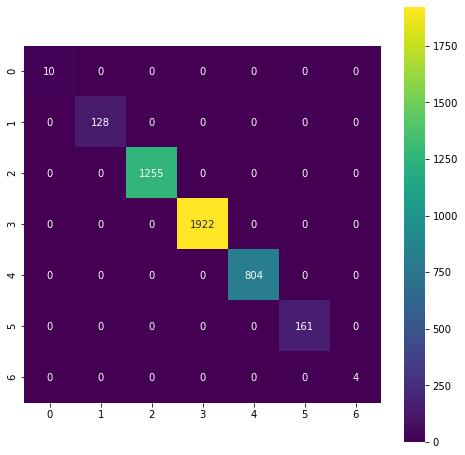

In [107]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_final, square=True, annot=True, fmt="d", cmap='viridis')

In [108]:
rf_final.predict([[0.23, 0.058, 186.0, 9.9]])

array([6], dtype=int64)

<b>Random Forest is a complex model of ensemble learning, It has great results and a high performance for regression and classification tasks.